In [92]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from glob import glob
import os

import torch
import torchvision.transforms as transforms

from models.generator import Generator

%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
main_path = "./data"
img_paths = []
for class_path in [os.path.join(main_path,class_name) for class_name in os.listdir(main_path)]:
    
    class_img_paths = glob(class_path+"/*")
    for class_img_path in class_img_paths:
        img_paths.append(class_img_path)

print("There are {} style images in Van Gogh Paintings Dataset".format(len(img_paths)))

There are 2025 style images in Van Gogh Paintings Dataset


In [94]:
loader = transforms.Compose([
    transforms.Resize((256, 256)),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # # fake batch dimension required to fit network's input dimensions
    # image = loader(image).unsqueeze(0)
    image = loader(image)
    return image.to(device, torch.float)

# TODO: fuck this shit 
images = None
for i, path in enumerate(img_paths[:10]):
    if i == 0:
        images = torch.tensor(image_loader(path))
        images = images.reshape((1, 3, 256, 256))
    else:
        images = torch.cat((images, image_loader(path).reshape((1, 3, 256, 256))), 0)

<ipython-input-94-c189e0236d32>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(image_loader(path))


In [97]:
num_images = images.shape[0]
model = Generator()
fakes = model(images)

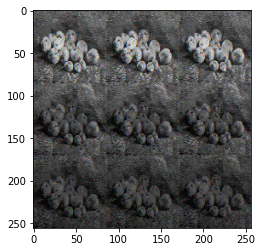

In [106]:
plt.imshow(images[8].detach().numpy().reshape((256, 256,3)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


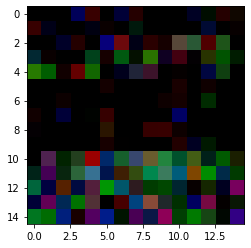

In [107]:
plt.imshow(fakes[8].detach().numpy().reshape((-1, 15, 3)))